# MAGIC GAMMA Telescope Classification 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/magic-gamma-telescope-dataset/telescope_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/magic-gamma-telescope-dataset/telescope_data.csv", index_col = 0)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [6]:
df.duplicated().sum()

115

In [7]:
df['class'] = (df['class'] == 'g').astype(int)

<AxesSubplot:ylabel='class'>

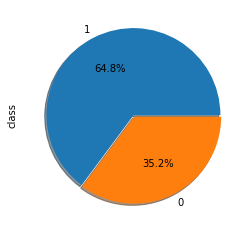

In [8]:
(df['class'].value_counts()/df.shape[0]*100).plot.pie(autopct = '%1.1f%%', explode = [0.0,0.02], shadow = True)

In [9]:
df['class'].value_counts()

1    12332
0     6688
Name: class, dtype: int64

In [10]:
features = df.columns

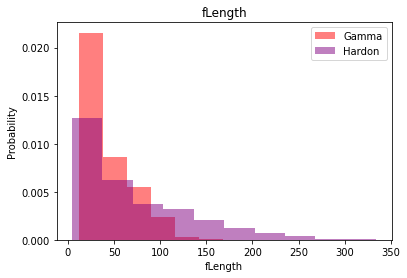

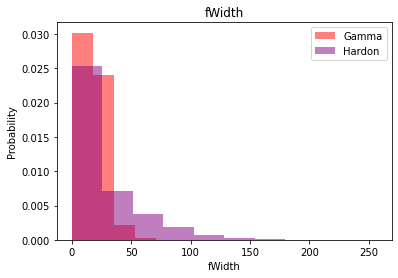

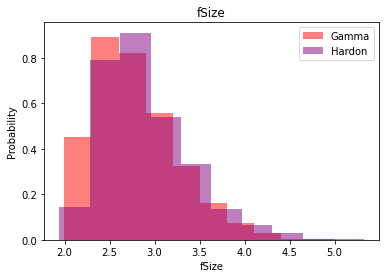

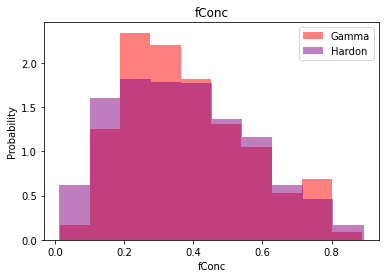

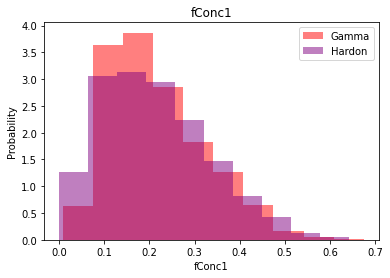

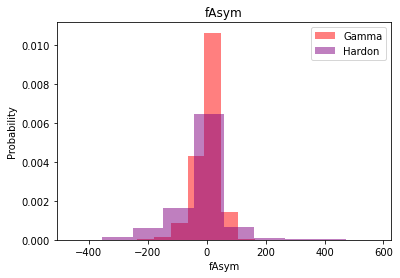

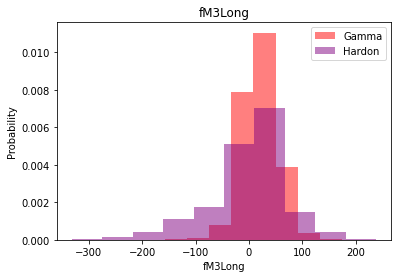

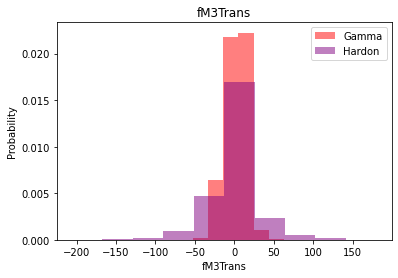

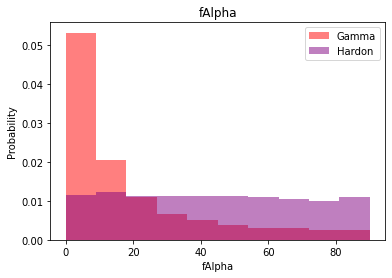

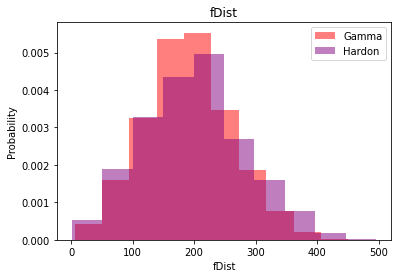

In [11]:
for feature in features[:-1]:
    plt.hist(df[df['class'] == 1][feature], color = 'red', label = 'Gamma', alpha = 0.5, density = True)
    plt.hist(df[df['class'] == 0][feature], color = 'purple', label = 'Hardon', alpha = 0.5, density = True)
    plt.title(feature)
    plt.ylabel("Probability")
    plt.xlabel(feature)
    plt.legend()
    plt.show()
    

# Training and Test Set
> Also scaling the data set

In [12]:

X = df[features[:-1]]
y = df['class']

In [13]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scaleData(dataframe, overSample = False): 
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    if overSample:
        ROS = RandomOverSampler()
        X ,y = ROS.fit_resample(X,y)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    data = np.hstack((X, np.reshape(y, (-1,1))))
    
    return X, y, data

In [14]:
X, y, data = scaleData(df, overSample = True)

In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knnModel = KNeighborsClassifier(n_neighbors = 3)
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred = knnModel.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2489
           1       0.84      0.86      0.85      2444

    accuracy                           0.85      4933
   macro avg       0.85      0.85      0.85      4933
weighted avg       0.85      0.85      0.85      4933



# Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [22]:
NB_y_pred = nb_model.predict(X_test)

In [23]:
print(classification_report(y_test, NB_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.39      0.52      2489
           1       0.59      0.89      0.71      2444

    accuracy                           0.64      4933
   macro avg       0.69      0.64      0.62      4933
weighted avg       0.69      0.64      0.62      4933



# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lgModel = LogisticRegression()
lgModel = lgModel.fit(X_train, y_train)

In [26]:
lg_y_pred = lgModel.predict(X_test)
print(classification_report(y_test, lg_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      2489
           1       0.74      0.82      0.78      2444

    accuracy                           0.77      4933
   macro avg       0.77      0.77      0.77      4933
weighted avg       0.77      0.77      0.77      4933



# Support Vector Machine (SVM)

In [27]:
from sklearn.svm import SVC

In [28]:
svmModel = SVC()
svmModel = svmModel.fit(X_train, y_train)

In [29]:
svm_y_pred = svmModel.predict(X_test)
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      2489
           1       0.81      0.91      0.85      2444

    accuracy                           0.85      4933
   macro avg       0.85      0.85      0.85      4933
weighted avg       0.85      0.85      0.85      4933



# **Neural Networks**

In [30]:
import tensorflow as tf

In [31]:
def train_NN_Model(X_train, y_train, num_nodes, droput_prob, learnRate, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = [10]),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
        ])

    nn_model.compile( optimizer = tf.keras.optimizers.Adam(learnRate), loss = 'binary_crossentropy',
                metrics = ['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)
    
    return nn_model, history

In [33]:
#history = nn_model.fit(
#     X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0
# )

In [34]:
def plotLoss(history):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,4))
    ax1.plot(history.history['loss'], label = 'Loss')
    ax1.plot(history.history['val_loss'], label = 'Val_Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel("Binary Crossentropy")
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label = 'Accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

In [ ]:
# plotLoss(history)

### Testing different parameters to increases NN accuracy

 nodes: 16 , dropout Probability: 0, learning rate: 0.01, and Batch Size: 32


2023-02-21 03:40:37.317672: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-21 03:40:37.678115: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


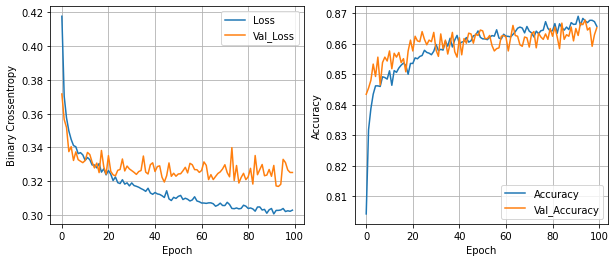

155/155 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8624
Val Loss: [0.33020785450935364, 0.8623555898666382]
 nodes: 16 , dropout Probability: 0, learning rate: 0.01, and Batch Size: 64


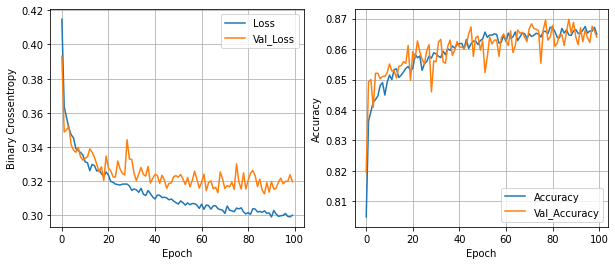

155/155 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8542
Val Loss: [0.3339014947414398, 0.8542469143867493]
 nodes: 16 , dropout Probability: 0, learning rate: 0.01, and Batch Size: 128


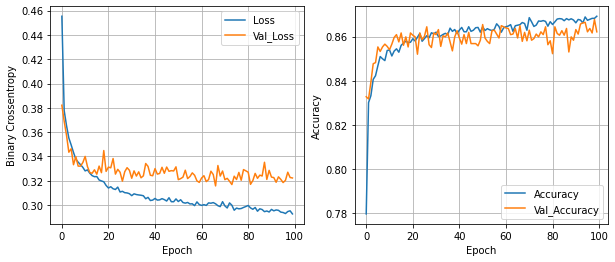

155/155 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8603
Val Loss: [0.32723119854927063, 0.8603283762931824]
 nodes: 16 , dropout Probability: 0, learning rate: 0.005, and Batch Size: 32


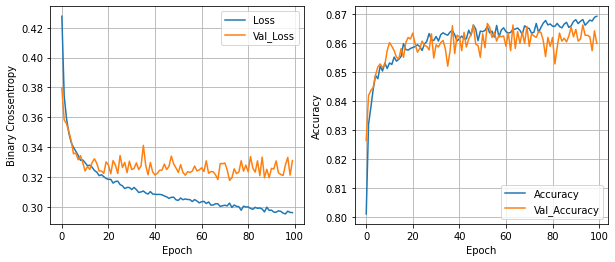

155/155 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8583
Val Loss: [0.3281513452529907, 0.8583012223243713]
 nodes: 16 , dropout Probability: 0, learning rate: 0.005, and Batch Size: 64


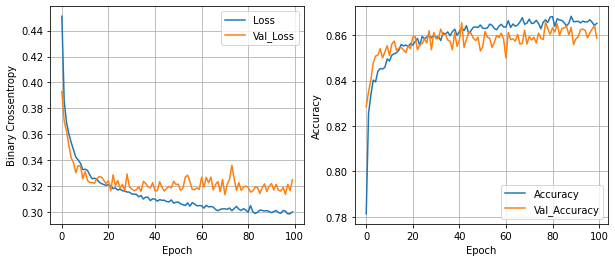

155/155 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8520
Val Loss: [0.3273540139198303, 0.8520170450210571]
 nodes: 16 , dropout Probability: 0, learning rate: 0.005, and Batch Size: 128


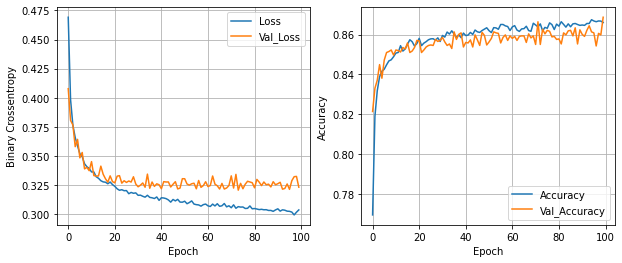

155/155 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8569
Val Loss: [0.33036667108535767, 0.8568822145462036]
 nodes: 16 , dropout Probability: 0, learning rate: 0.001, and Batch Size: 32


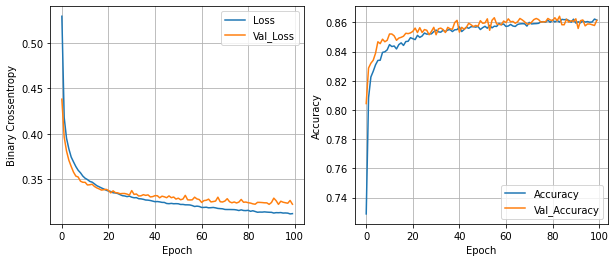

155/155 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8565
Val Loss: [0.3274269104003906, 0.8564767837524414]
 nodes: 16 , dropout Probability: 0, learning rate: 0.001, and Batch Size: 64


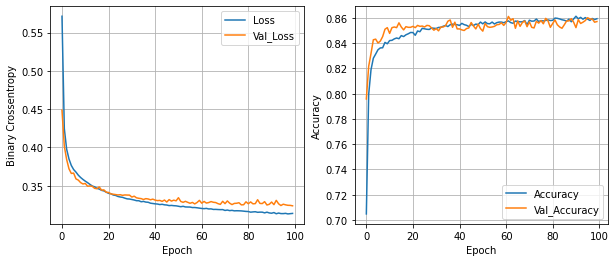

155/155 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8538
Val Loss: [0.31984418630599976, 0.8538414835929871]
 nodes: 16 , dropout Probability: 0, learning rate: 0.001, and Batch Size: 128


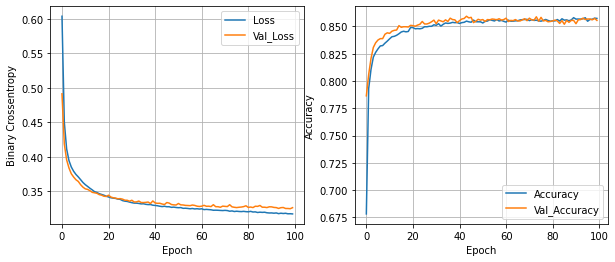

155/155 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.8569
Val Loss: [0.3230447769165039, 0.8568822145462036]
 nodes: 16 , dropout Probability: 0.2, learning rate: 0.01, and Batch Size: 32


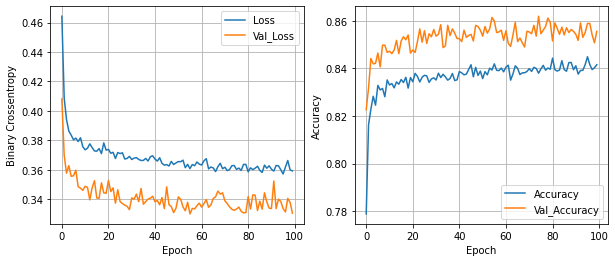

155/155 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8508
Val Loss: [0.33240413665771484, 0.8508007526397705]
 nodes: 16 , dropout Probability: 0.2, learning rate: 0.01, and Batch Size: 64


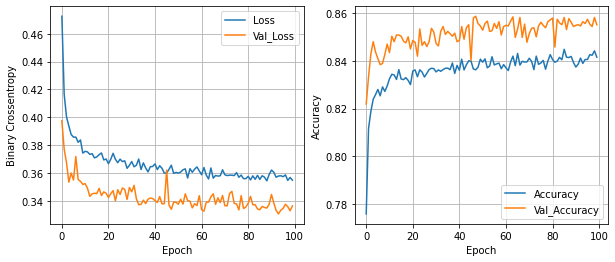

155/155 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8494
Val Loss: [0.3383745849132538, 0.849381685256958]
 nodes: 16 , dropout Probability: 0.2, learning rate: 0.01, and Batch Size: 128


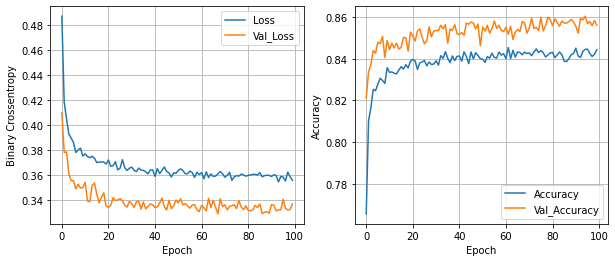

155/155 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8516
Val Loss: [0.3361187279224396, 0.8516116142272949]
 nodes: 16 , dropout Probability: 0.2, learning rate: 0.005, and Batch Size: 32


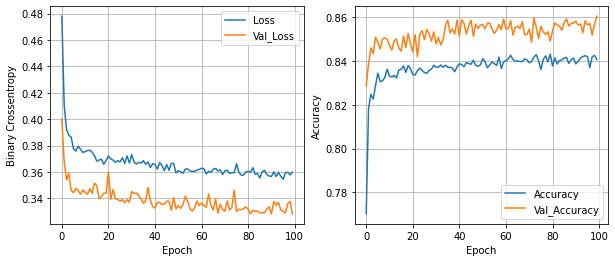

155/155 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8508
Val Loss: [0.32842323184013367, 0.8508007526397705]
 nodes: 16 , dropout Probability: 0.2, learning rate: 0.005, and Batch Size: 64


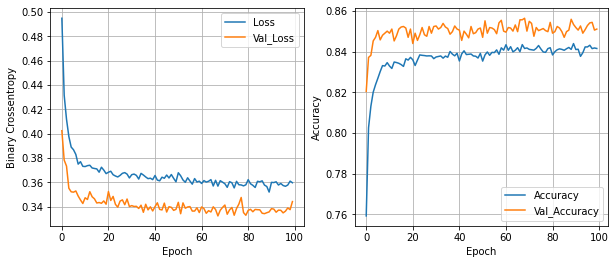

155/155 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8510
Val Loss: [0.34337934851646423, 0.8510034680366516]
 nodes: 16 , dropout Probability: 0.2, learning rate: 0.005, and Batch Size: 128


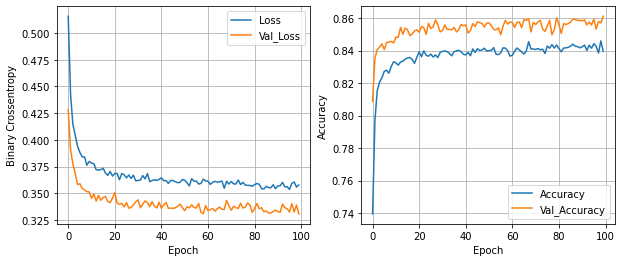

155/155 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8559
Val Loss: [0.33025655150413513, 0.8558686375617981]
 nodes: 16 , dropout Probability: 0.2, learning rate: 0.001, and Batch Size: 32


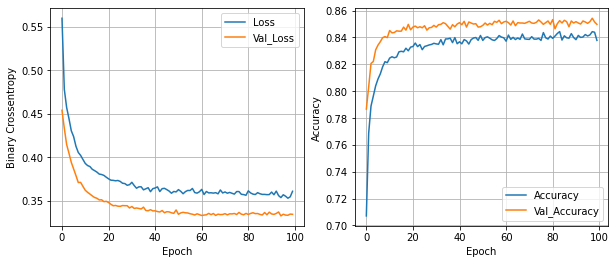

155/155 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8542
Val Loss: [0.33097729086875916, 0.8542469143867493]
 nodes: 16 , dropout Probability: 0.2, learning rate: 0.001, and Batch Size: 64


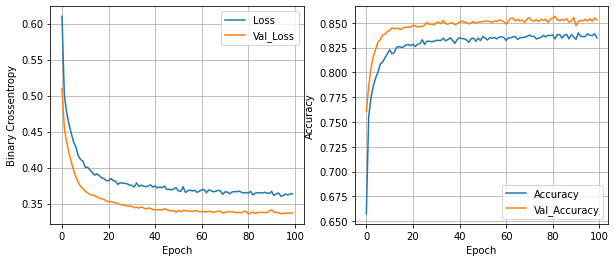

155/155 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8540
Val Loss: [0.33510059118270874, 0.8540441989898682]
 nodes: 16 , dropout Probability: 0.2, learning rate: 0.001, and Batch Size: 128


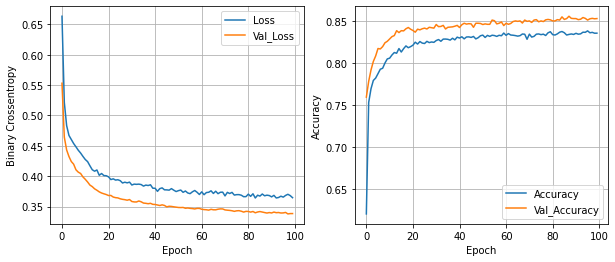

155/155 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8476
Val Loss: [0.33942505717277527, 0.8475572466850281]
 nodes: 32 , dropout Probability: 0, learning rate: 0.01, and Batch Size: 32


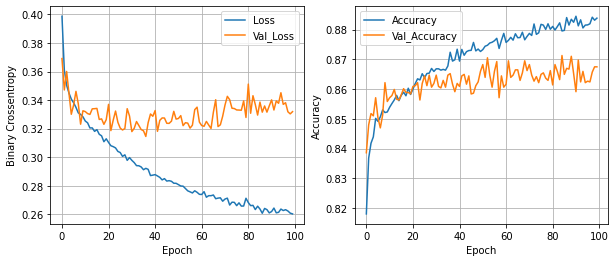

155/155 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8624
Val Loss: [0.33298730850219727, 0.8623555898666382]
 nodes: 32 , dropout Probability: 0, learning rate: 0.01, and Batch Size: 64


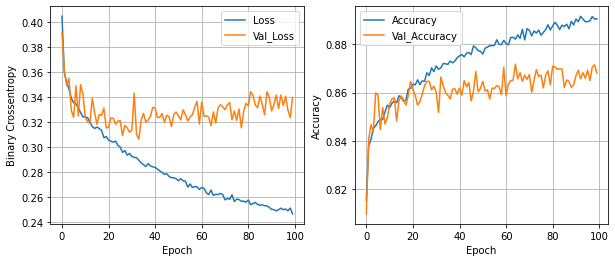

155/155 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8640
Val Loss: [0.3457385003566742, 0.863977313041687]
 nodes: 32 , dropout Probability: 0, learning rate: 0.01, and Batch Size: 128


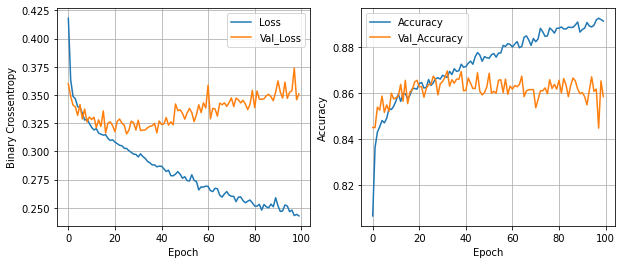

155/155 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.8622
Val Loss: [0.34541645646095276, 0.8621528744697571]
 nodes: 32 , dropout Probability: 0, learning rate: 0.005, and Batch Size: 32


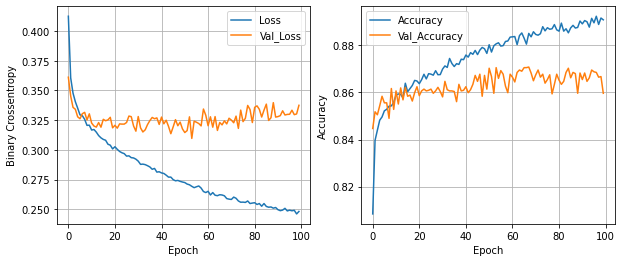

155/155 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8591
Val Loss: [0.3345286548137665, 0.8591120839118958]
 nodes: 32 , dropout Probability: 0, learning rate: 0.005, and Batch Size: 64


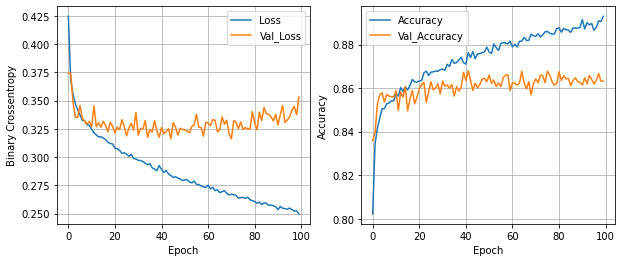

155/155 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8520
Val Loss: [0.34247612953186035, 0.8520170450210571]
 nodes: 32 , dropout Probability: 0, learning rate: 0.005, and Batch Size: 128


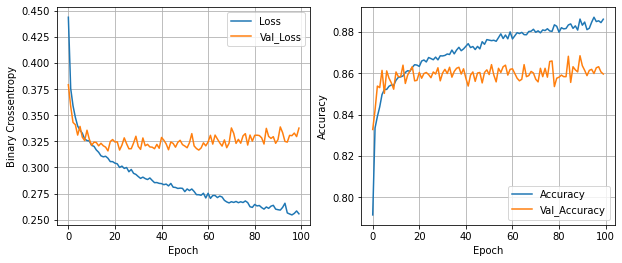

155/155 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8581
Val Loss: [0.3234473168849945, 0.8580985069274902]
 nodes: 32 , dropout Probability: 0, learning rate: 0.001, and Batch Size: 32


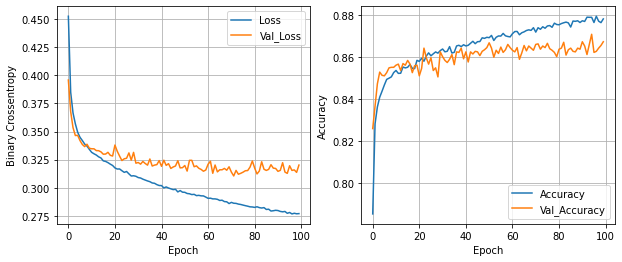

155/155 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8617
Val Loss: [0.3213036060333252, 0.8617474436759949]
 nodes: 32 , dropout Probability: 0, learning rate: 0.001, and Batch Size: 64


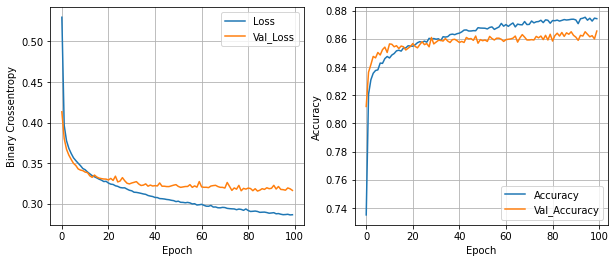

155/155 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8634
Val Loss: [0.317210853099823, 0.8633691668510437]
 nodes: 32 , dropout Probability: 0, learning rate: 0.001, and Batch Size: 128


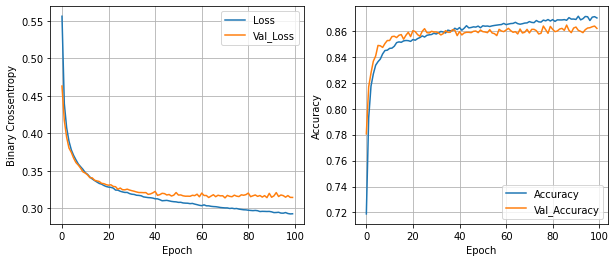

155/155 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8542
Val Loss: [0.32170337438583374, 0.8542469143867493]
 nodes: 32 , dropout Probability: 0.2, learning rate: 0.01, and Batch Size: 32


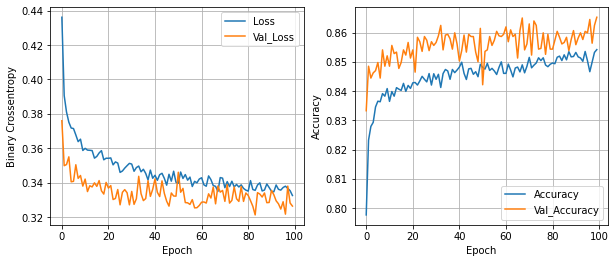

155/155 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8611
Val Loss: [0.31834322214126587, 0.8611392378807068]
 nodes: 32 , dropout Probability: 0.2, learning rate: 0.01, and Batch Size: 64


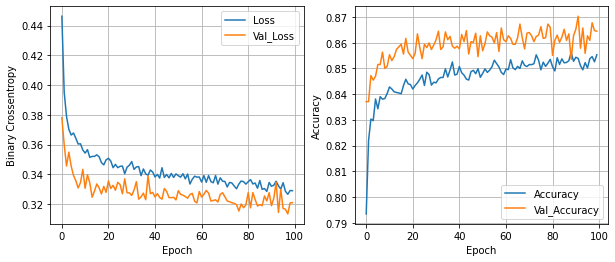

155/155 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8607
Val Loss: [0.32242292165756226, 0.8607338070869446]
 nodes: 32 , dropout Probability: 0.2, learning rate: 0.01, and Batch Size: 128


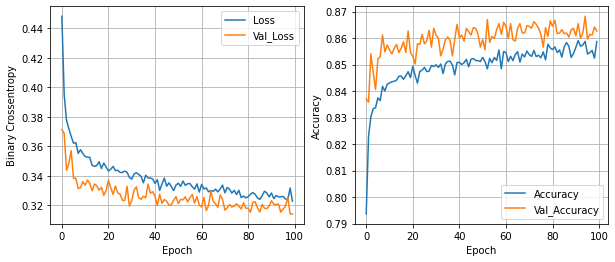

155/155 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8656
Val Loss: [0.3119454085826874, 0.8655990362167358]
 nodes: 32 , dropout Probability: 0.2, learning rate: 0.005, and Batch Size: 32


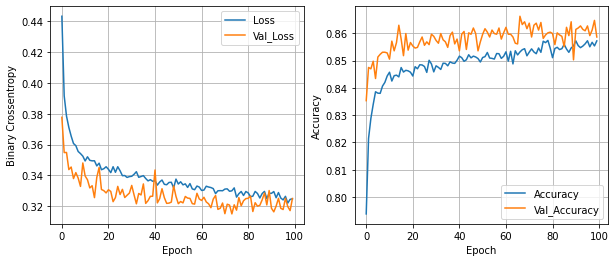

155/155 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8611
Val Loss: [0.3242420256137848, 0.8611392378807068]
 nodes: 32 , dropout Probability: 0.2, learning rate: 0.005, and Batch Size: 64


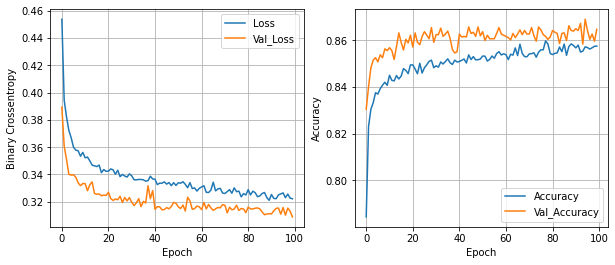

155/155 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8646
Val Loss: [0.3109639286994934, 0.8645854592323303]
 nodes: 32 , dropout Probability: 0.2, learning rate: 0.005, and Batch Size: 128


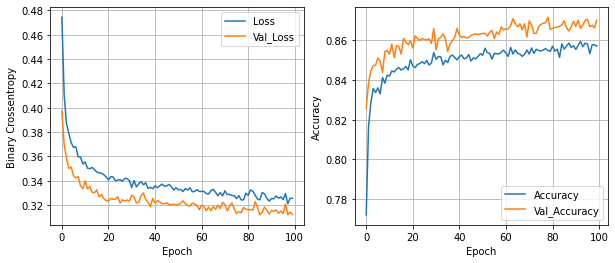

155/155 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.8644
Val Loss: [0.3137940466403961, 0.8643827438354492]
 nodes: 32 , dropout Probability: 0.2, learning rate: 0.001, and Batch Size: 32


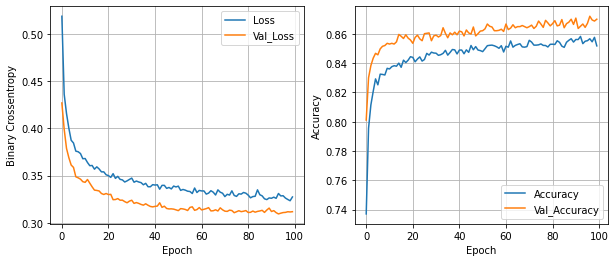

155/155 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8646
Val Loss: [0.3172229528427124, 0.8645854592323303]
 nodes: 32 , dropout Probability: 0.2, learning rate: 0.001, and Batch Size: 64


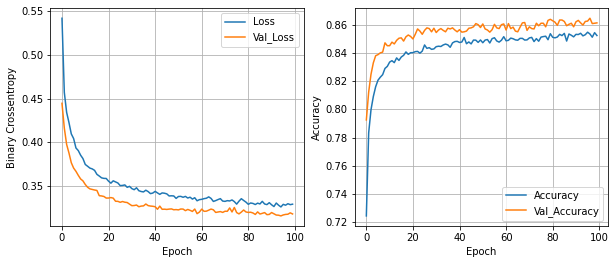

155/155 [==============================] - 0s 1ms/step - loss: 0.3204 - accuracy: 0.8589
Val Loss: [0.3203890025615692, 0.8589093685150146]
 nodes: 32 , dropout Probability: 0.2, learning rate: 0.001, and Batch Size: 128


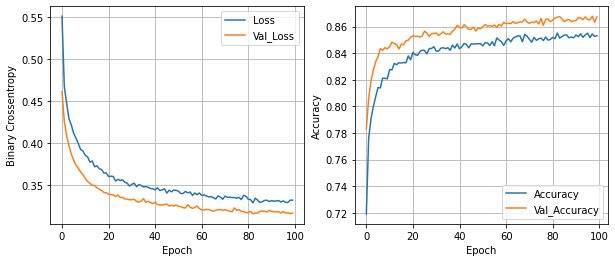

155/155 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8672
Val Loss: [0.3189013600349426, 0.8672207593917847]
 nodes: 64 , dropout Probability: 0, learning rate: 0.01, and Batch Size: 32


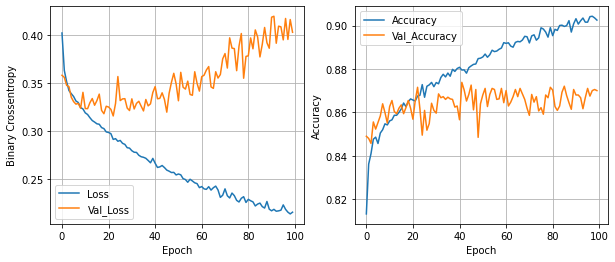

155/155 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8636
Val Loss: [0.3901774287223816, 0.8635718822479248]
 nodes: 64 , dropout Probability: 0, learning rate: 0.01, and Batch Size: 64


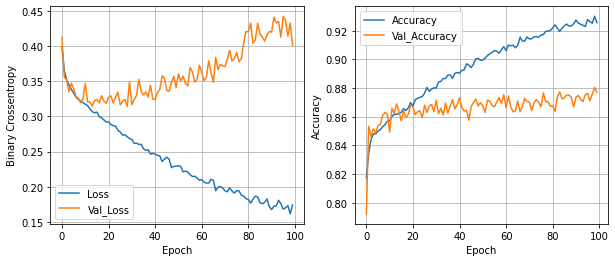

155/155 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.8688
Val Loss: [0.45335498452186584, 0.8688424825668335]
 nodes: 64 , dropout Probability: 0, learning rate: 0.01, and Batch Size: 128


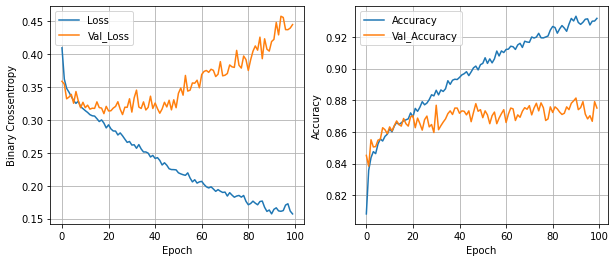

155/155 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8690
Val Loss: [0.4604314863681793, 0.8690451979637146]
 nodes: 64 , dropout Probability: 0, learning rate: 0.005, and Batch Size: 32


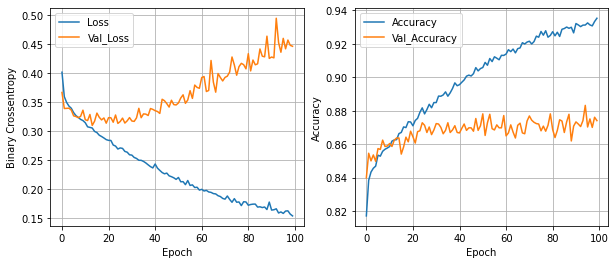

155/155 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.8739
Val Loss: [0.457569420337677, 0.8739104270935059]
 nodes: 64 , dropout Probability: 0, learning rate: 0.005, and Batch Size: 64


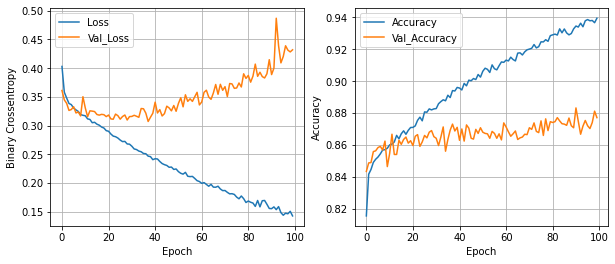

155/155 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.8678
Val Loss: [0.45797985792160034, 0.867828905582428]
 nodes: 64 , dropout Probability: 0, learning rate: 0.005, and Batch Size: 128


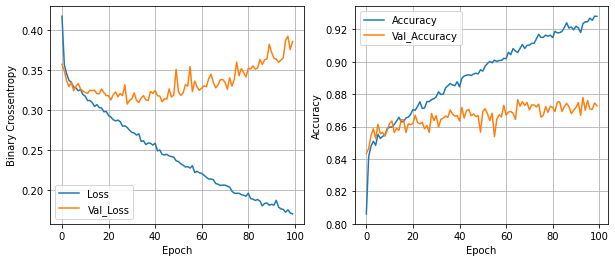

155/155 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8743
Val Loss: [0.3661155700683594, 0.8743158578872681]
 nodes: 64 , dropout Probability: 0, learning rate: 0.001, and Batch Size: 32


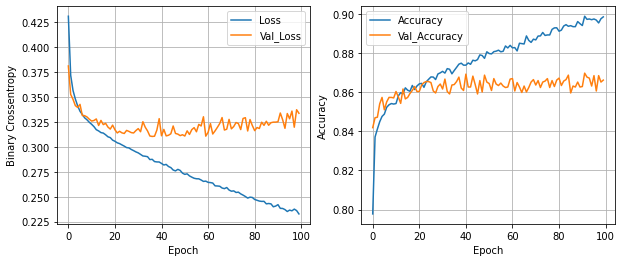

155/155 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8654
Val Loss: [0.3299470841884613, 0.8653963208198547]
 nodes: 64 , dropout Probability: 0, learning rate: 0.001, and Batch Size: 64


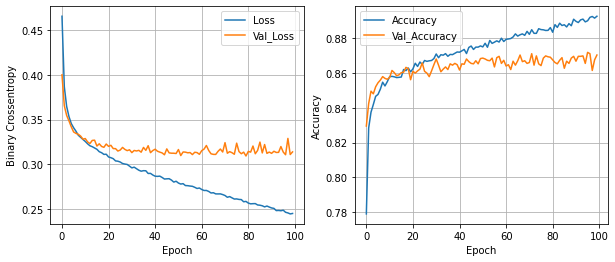

155/155 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8686
Val Loss: [0.307753324508667, 0.8686397671699524]
 nodes: 64 , dropout Probability: 0, learning rate: 0.001, and Batch Size: 128


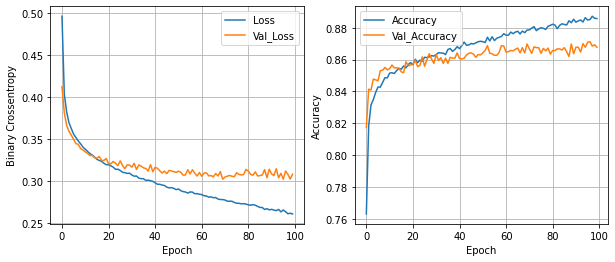

155/155 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8644
Val Loss: [0.3113822340965271, 0.8643827438354492]
 nodes: 64 , dropout Probability: 0.2, learning rate: 0.01, and Batch Size: 32


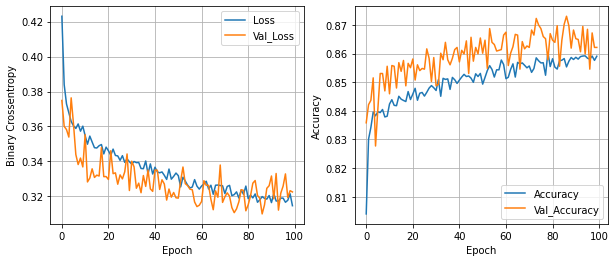

155/155 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8587
Val Loss: [0.32766807079315186, 0.8587066531181335]
 nodes: 64 , dropout Probability: 0.2, learning rate: 0.01, and Batch Size: 64


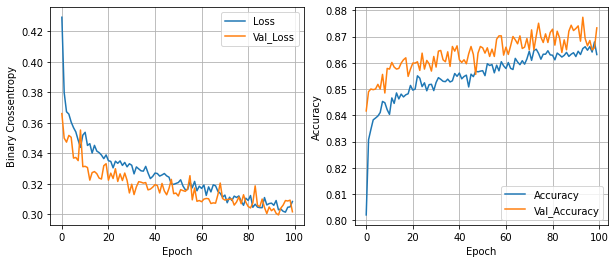

155/155 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8668
Val Loss: [0.3045959770679474, 0.8668153285980225]
 nodes: 64 , dropout Probability: 0.2, learning rate: 0.01, and Batch Size: 128


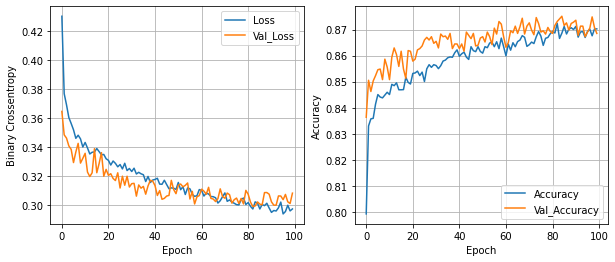

155/155 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8626
Val Loss: [0.31220561265945435, 0.8625583052635193]
 nodes: 64 , dropout Probability: 0.2, learning rate: 0.005, and Batch Size: 32


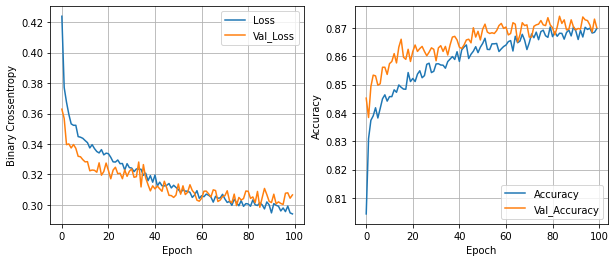

155/155 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8662
Val Loss: [0.3120488226413727, 0.8662071824073792]
 nodes: 64 , dropout Probability: 0.2, learning rate: 0.005, and Batch Size: 64


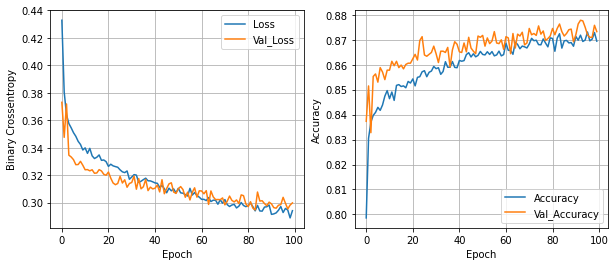

155/155 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.8699
Val Loss: [0.3061779737472534, 0.869856059551239]
 nodes: 64 , dropout Probability: 0.2, learning rate: 0.005, and Batch Size: 128


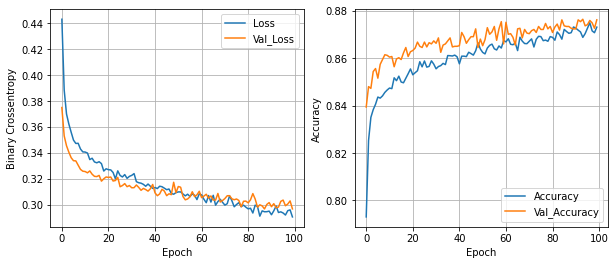

155/155 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8662
Val Loss: [0.302678644657135, 0.8662071824073792]
 nodes: 64 , dropout Probability: 0.2, learning rate: 0.001, and Batch Size: 32


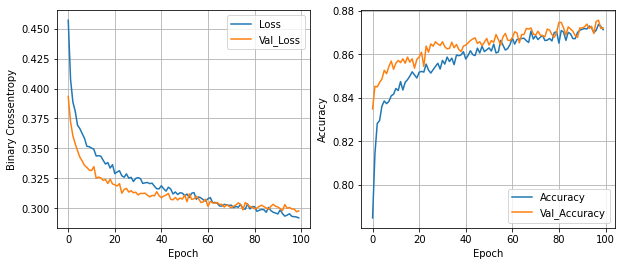

155/155 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8707
Val Loss: [0.2972789704799652, 0.8706669211387634]
 nodes: 64 , dropout Probability: 0.2, learning rate: 0.001, and Batch Size: 64


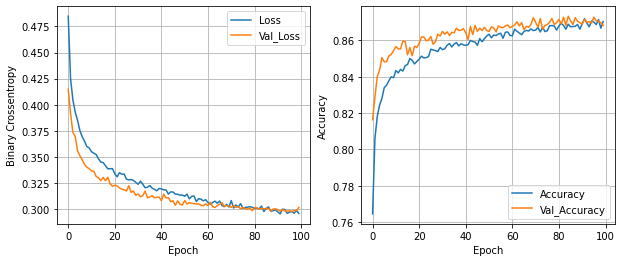

155/155 [==============================] - 0s 1ms/step - loss: 0.3023 - accuracy: 0.8705
Val Loss: [0.30225908756256104, 0.8704642057418823]
 nodes: 64 , dropout Probability: 0.2, learning rate: 0.001, and Batch Size: 128


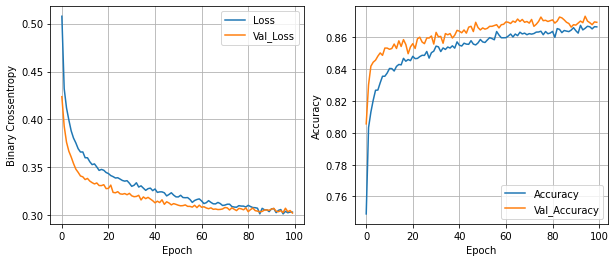

155/155 [==============================] - 0s 1ms/step - loss: 0.3060 - accuracy: 0.8717
Val Loss: [0.3059938848018646, 0.871680498123169]


In [36]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0, 0.2]:
        for learnRate in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f" nodes: {num_nodes} , dropout Probability: {dropout_prob}, learning rate: {learnRate}, and Batch Size: {batch_size}")
                model, history = train_NN_Model(X_train, y_train, num_nodes, dropout_prob, learnRate, batch_size, epochs)
                plotLoss(history)
                val_Loss = model.evaluate(X_test, y_test)
                print("Val Loss:", val_Loss)
                #if val_Loss < least_val_loss:
                    #least_val_loss = val_loss
                    #least_loss_model = model

In [37]:
nn_y_pred = least_loss_model.predict(X_test)
nn_y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, nn_y_pred))

AttributeError: 'NoneType' object has no attribute 'predict'